Normal model for Simon Newcomb's experiment (BDA3 p.66)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

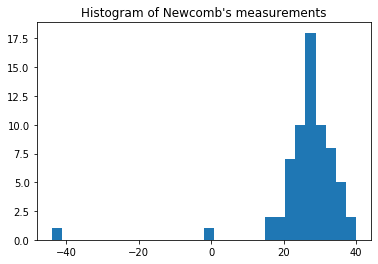

In [10]:
# with open('../data/light.txt', 'r') as f:
#     data = f.readlines()   
# y = np.asarray(y, dtype=int)  

y = np.loadtxt('../data/light.txt')

plt.hist(y, bins=30)
plt.title('Histogram of Newcomb\'s measurements');

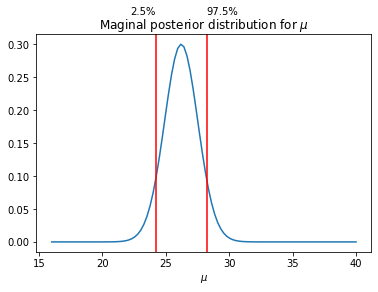

In [20]:
# sufficient statistics
n = len(y)
y_mean = np.mean(y)
y_var = np.var(y, ddof=1)  # ddof=1 -> sample estimate

# grid for computing density of mu
mu_grid = np.linspace(np.min(y[y>0]), np.max(y), 100)

# compute the exact marginal posterior density for mu
# multiplication by 1./sqrt(y_var/n) is due to the transformation of variable
pm_mu = stats.t.pdf((mu_grid - y_mean) / np.sqrt(y_var/n), n-1) / np.sqrt(y_var/n)
mu025, mu975 = y_mean + stats.t.ppf(0.025, n-1), y_mean + stats.t.ppf(0.975, n-1)

# plot the posterior of mu
plt.plot(mu_grid, pm_mu)
plt.axvline(mu025, color='red')
plt.axvline(mu975, color='red')
axes = plt.gca()
plt.text(
    mu025,
    axes.get_ylim()[1]+0.03,
    '2.5%',
     horizontalalignment='right'
)
plt.text(
    mu975,
    axes.get_ylim()[1]+0.03,
    '97.5%',
    horizontalalignment='left'
)

plt.xlabel(r'$\mu$')
plt.title(r'Maginal posterior distribution for $\mu$');


In [27]:
# calculate posterior interval by simulation
n_sample = 1000
# draw sigma squares
sigma2_sample = (n-1)* y_var / stats.chi2.rvs(df=n-1, size=n_sample)
mu_sample = stats.norm.rvs(y_mean, sigma2_sample/n, size=(1, n_sample))

# posterior median and 95% posterior interval
mu_sample_median = np.median(mu_sample)
mu_sample_025, mu_sample_975 = np.percentile(mu_sample, [2.5, 97.5])
print('mu sample median: {0:.2f}\n95% posterior interval:[{1:.2f}, {2:.2f}]'.format(mu_sample_median, mu_sample_025, mu_sample_975))

mu sample median: 26.23
95% posterior interval:[22.32, 29.78]
